In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
sns.set()
import os
import glob
from tqdm import tqdm
import time
import math

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [3]:
delivery_info=pd.read_csv('../data/raw/meta_data/delivery_info.csv', index_col=0)
TS_delivery_info = delivery_info[delivery_info.index.str.match('TS')]
TF_delivery_info = delivery_info[delivery_info.index.str.match('TF')]
T_delivery_info = delivery_info[~delivery_info.index.str.match('TS|TF')]

## Raw

In [5]:
T_bid_plus_ask = pd.read_csv('../data/interim/raw_features/T/T_Posted_Size.csv', index_col='trading_date', parse_dates=True)
TF_bid_plus_ask = pd.read_csv('../data/interim/raw_features/TF/TF_Posted_Size.csv', index_col='trading_date', parse_dates=True)

In [7]:
T_bid_plus_ask = T_bid_plus_ask.div(T_bid_plus_ask.sum(axis=1), axis=0)
TF_bid_plus_ask = TF_bid_plus_ask.div(TF_bid_plus_ask.sum(axis=1), axis=0)

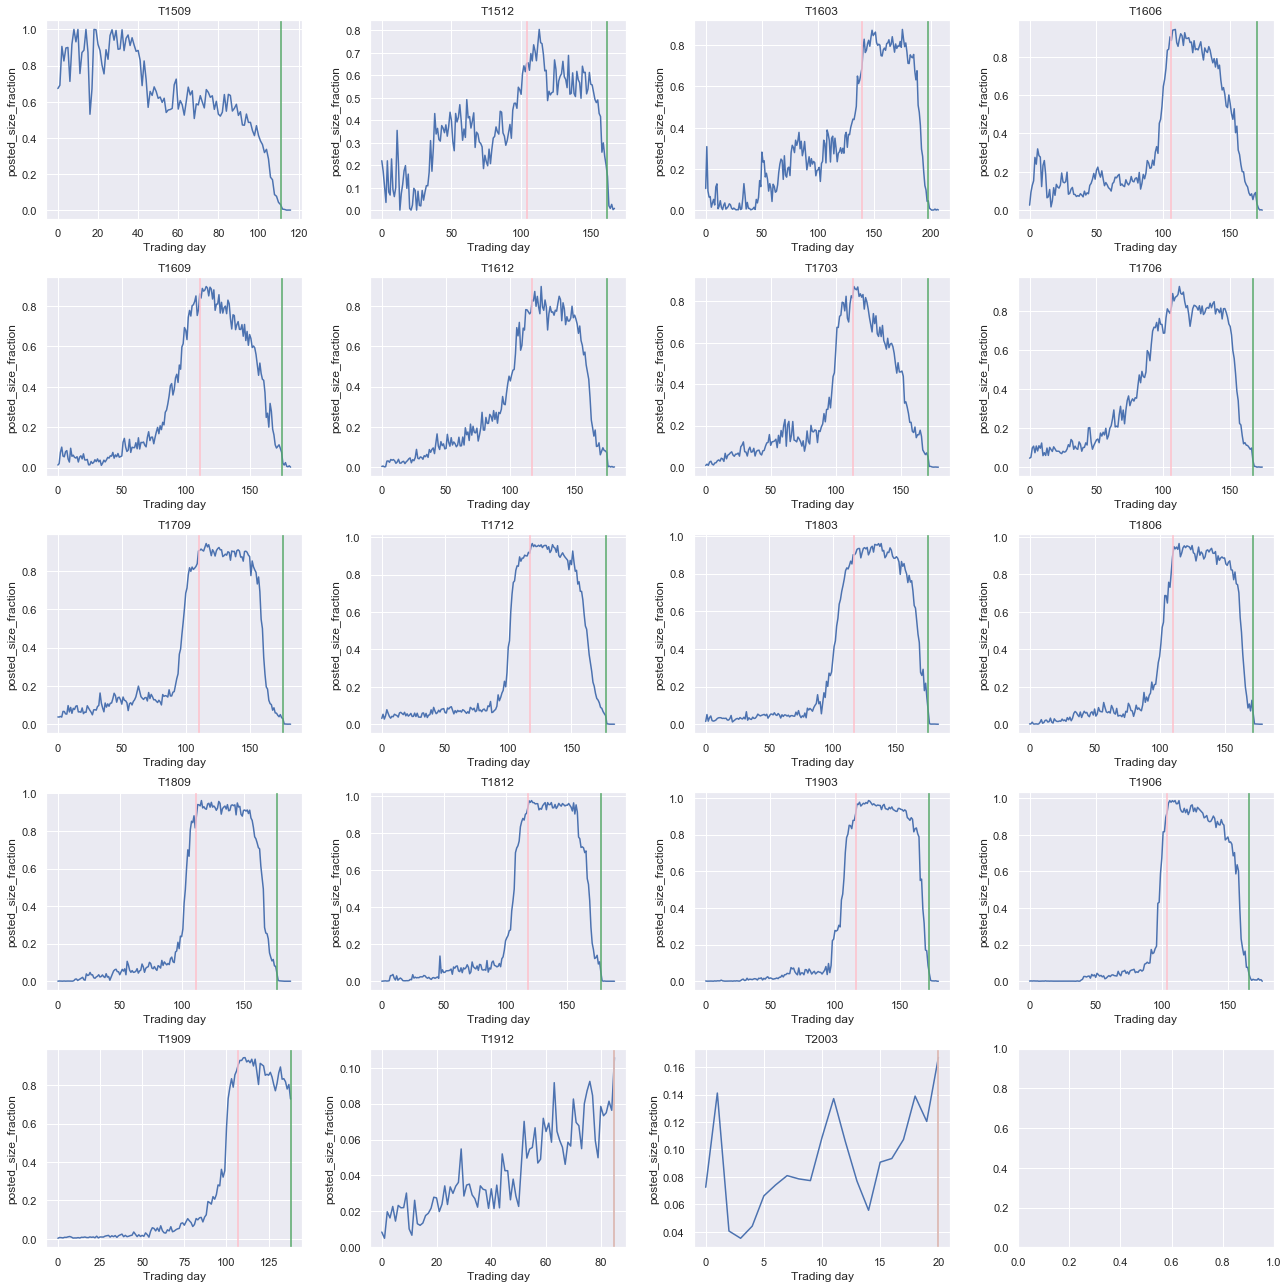

In [9]:
fig, ax = plt.subplots(math.ceil((T_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4

    ax[j][k].plot(range(len(T_bid_plus_ask[contract].dropna())), T_bid_plus_ask[contract].dropna())
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = (T_bid_plus_ask[contract].dropna())[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = (T_bid_plus_ask[contract].dropna())[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink')
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

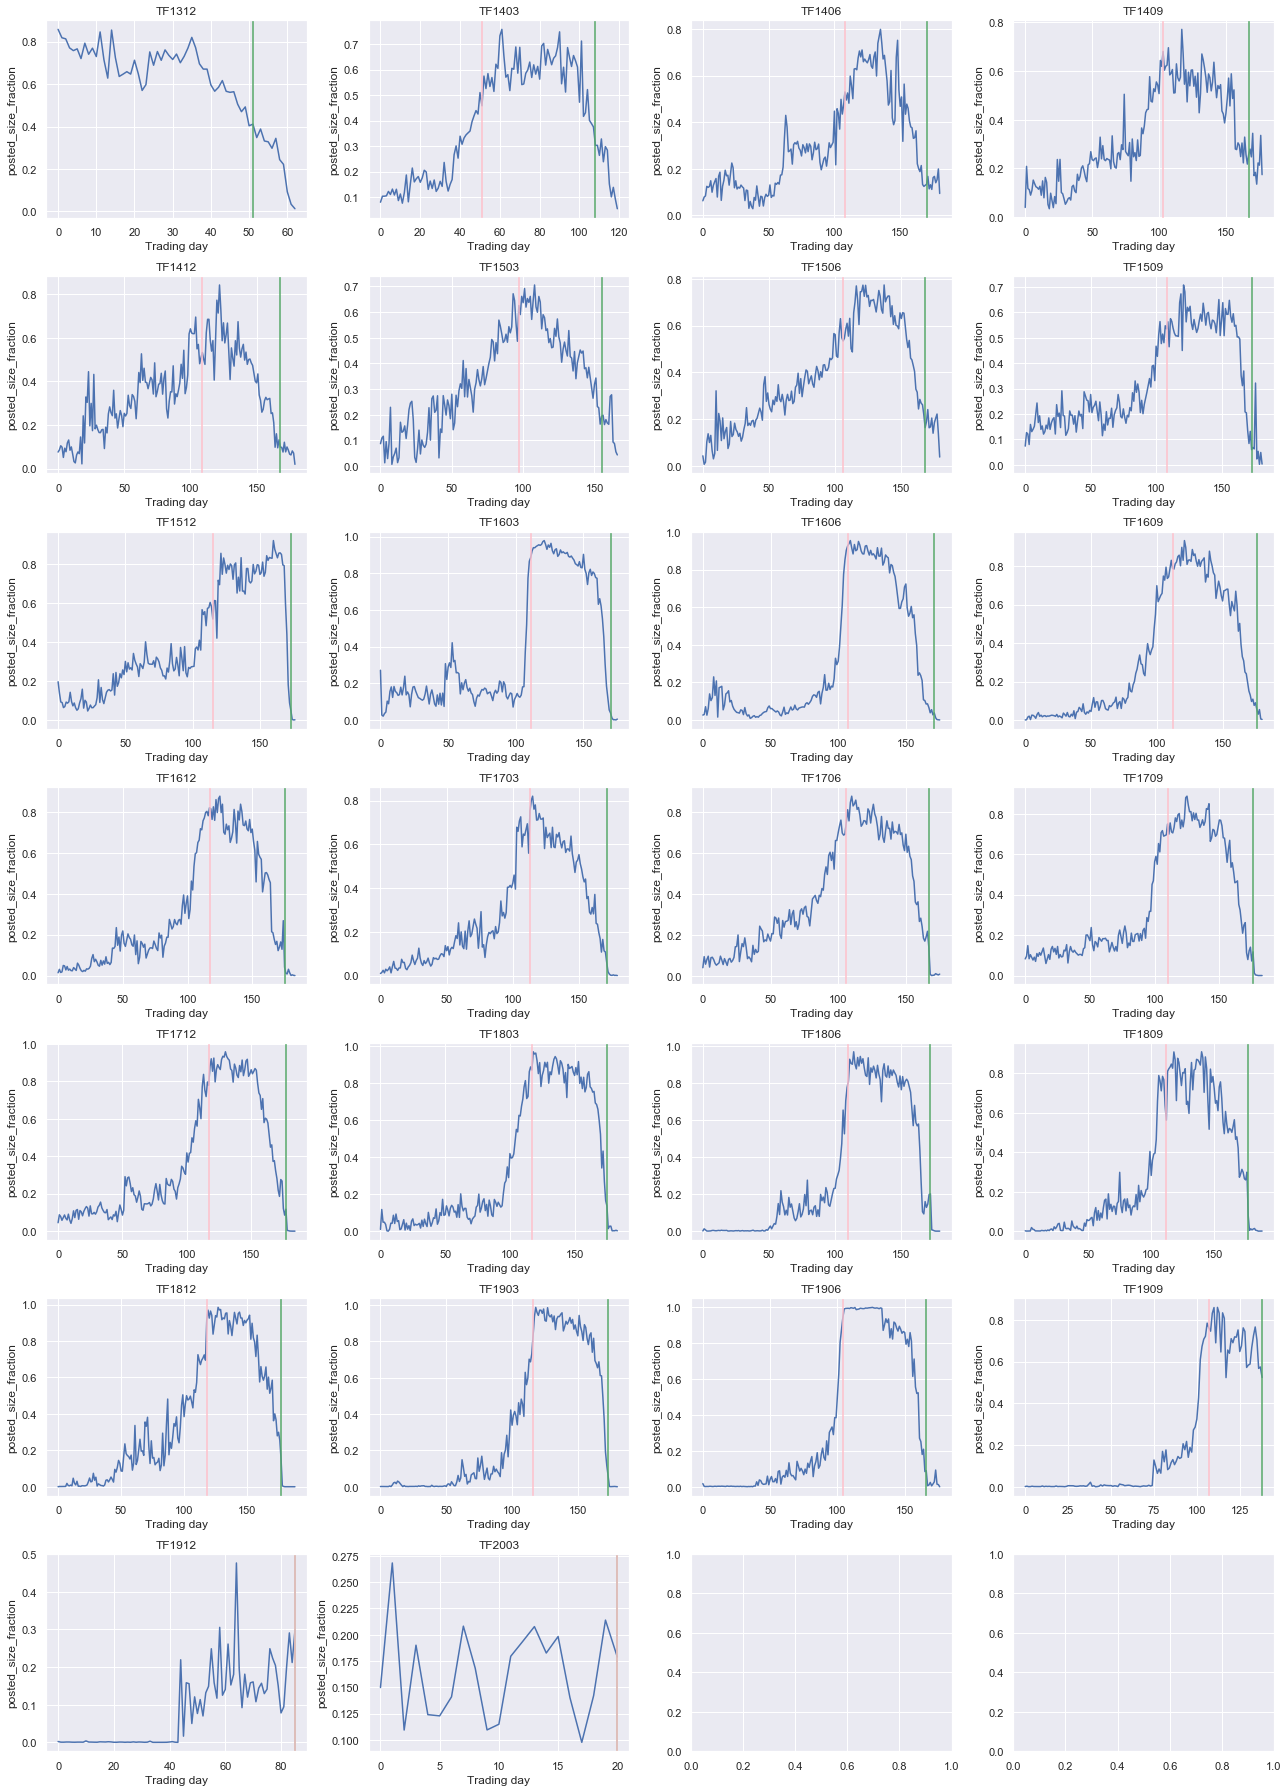

In [10]:
fig, ax = plt.subplots(math.ceil((TF_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 25))

for i, contract in enumerate(TF_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4

    ax[j][k].plot(range(len(TF_bid_plus_ask[contract].dropna())), TF_bid_plus_ask[contract].dropna())
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = (TF_bid_plus_ask[contract].dropna())[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
        
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = (TF_bid_plus_ask[contract].dropna())[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink')
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Rolling mean

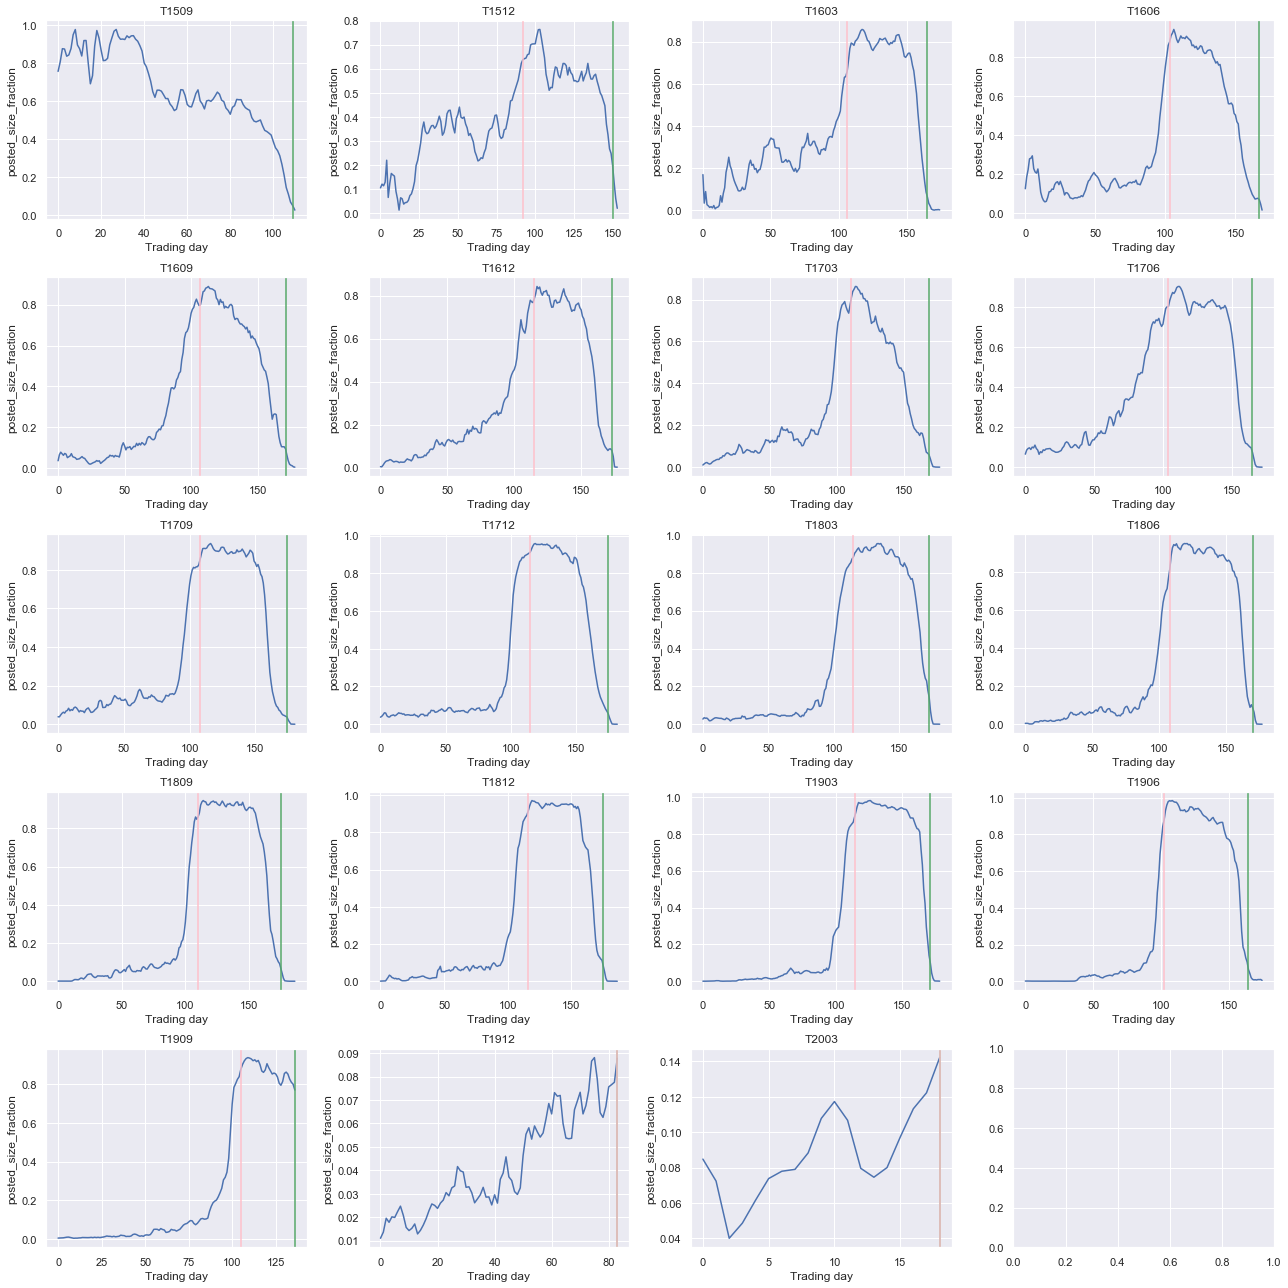

In [11]:
fig, ax = plt.subplots(math.ceil((T_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_bid_plus_ask[contract].rolling(3).mean().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

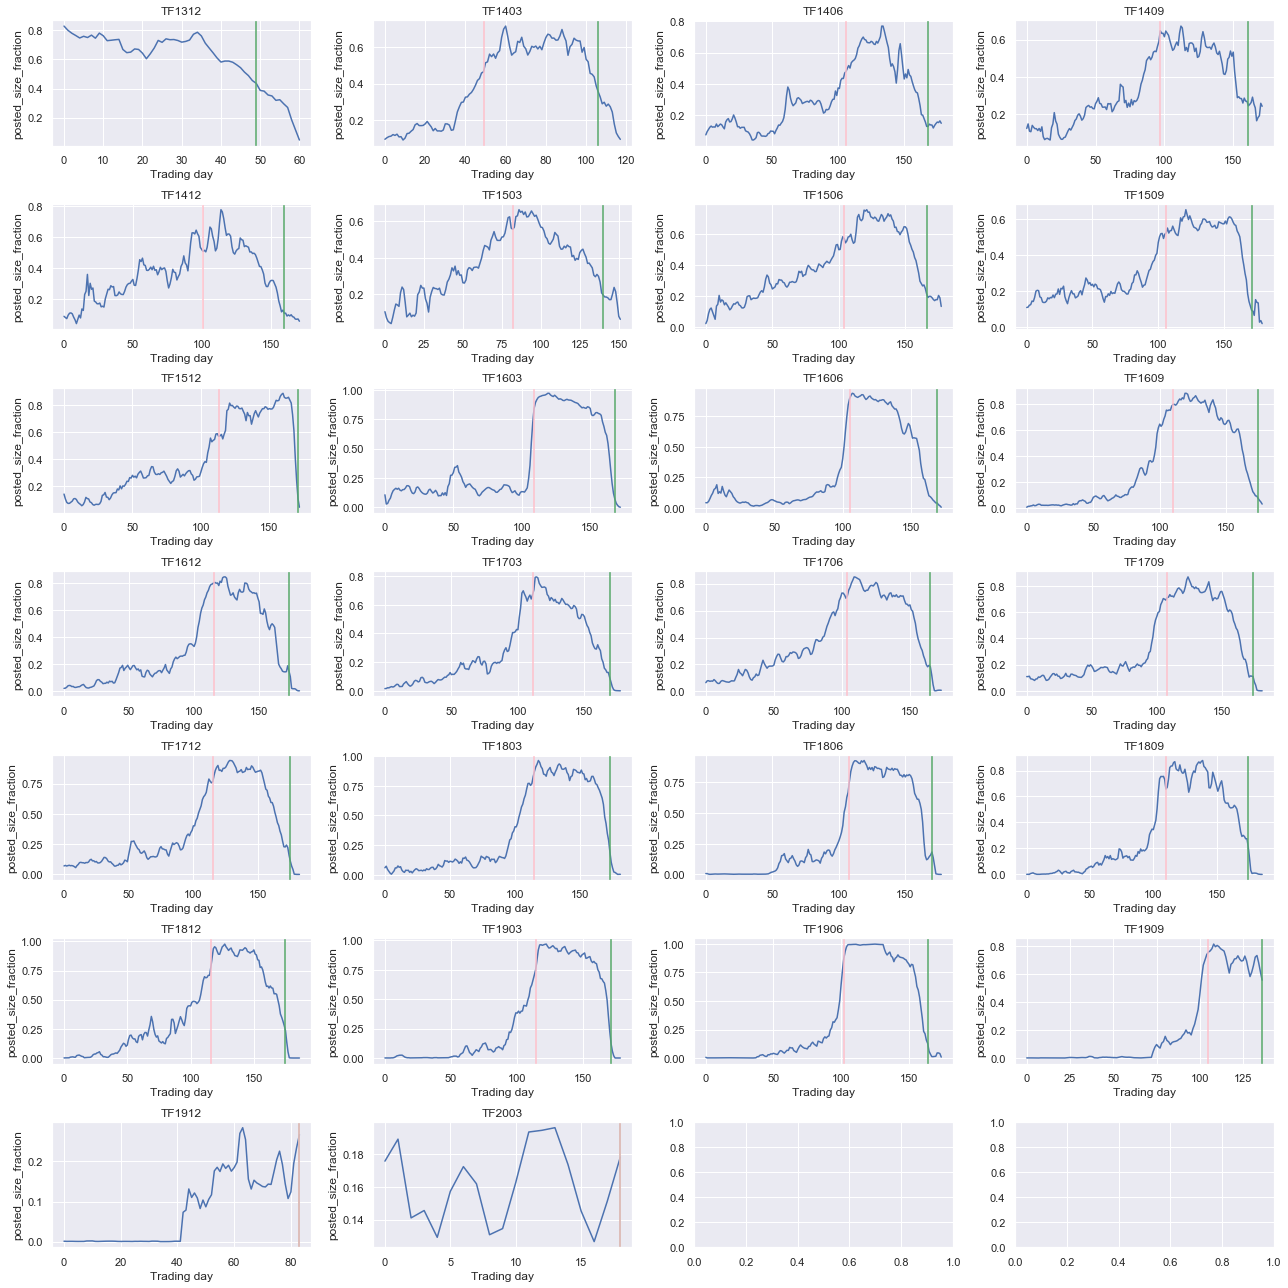

In [12]:
fig, ax = plt.subplots(math.ceil((TF_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_bid_plus_ask[contract].rolling(3).mean().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Rolling Std

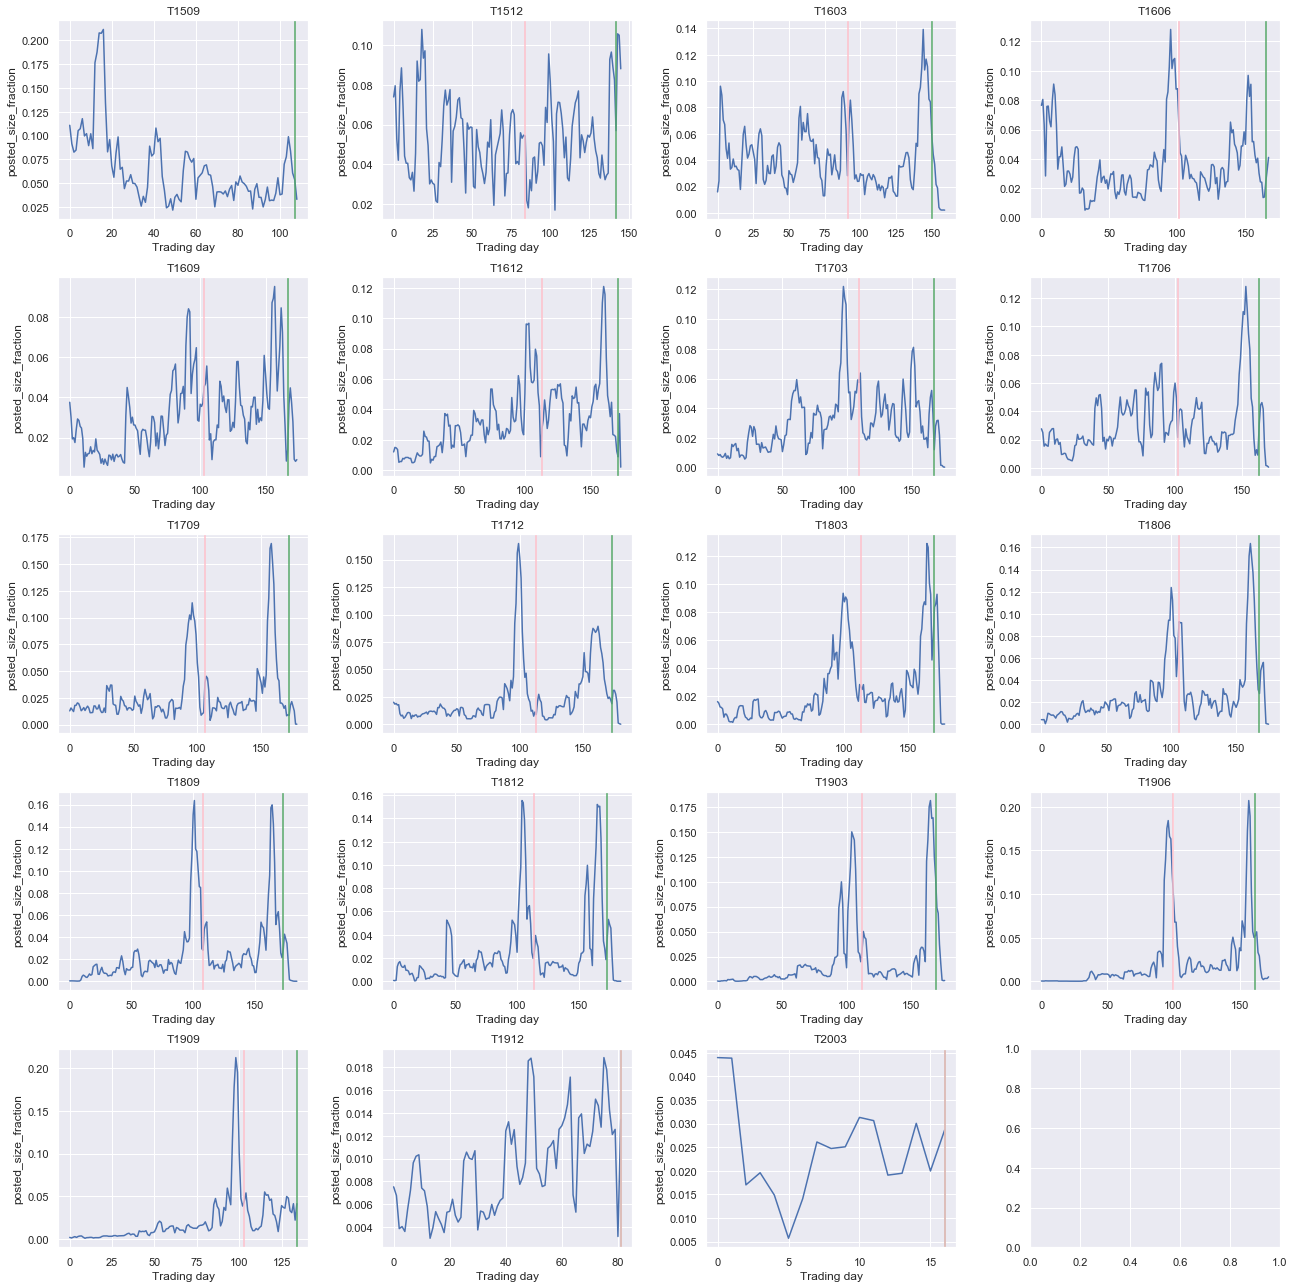

In [13]:
fig, ax = plt.subplots(math.ceil((T_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_bid_plus_ask[contract].rolling(5).std().dropna()
    ax[j][k].plot(range(len(sample)), sample)

    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

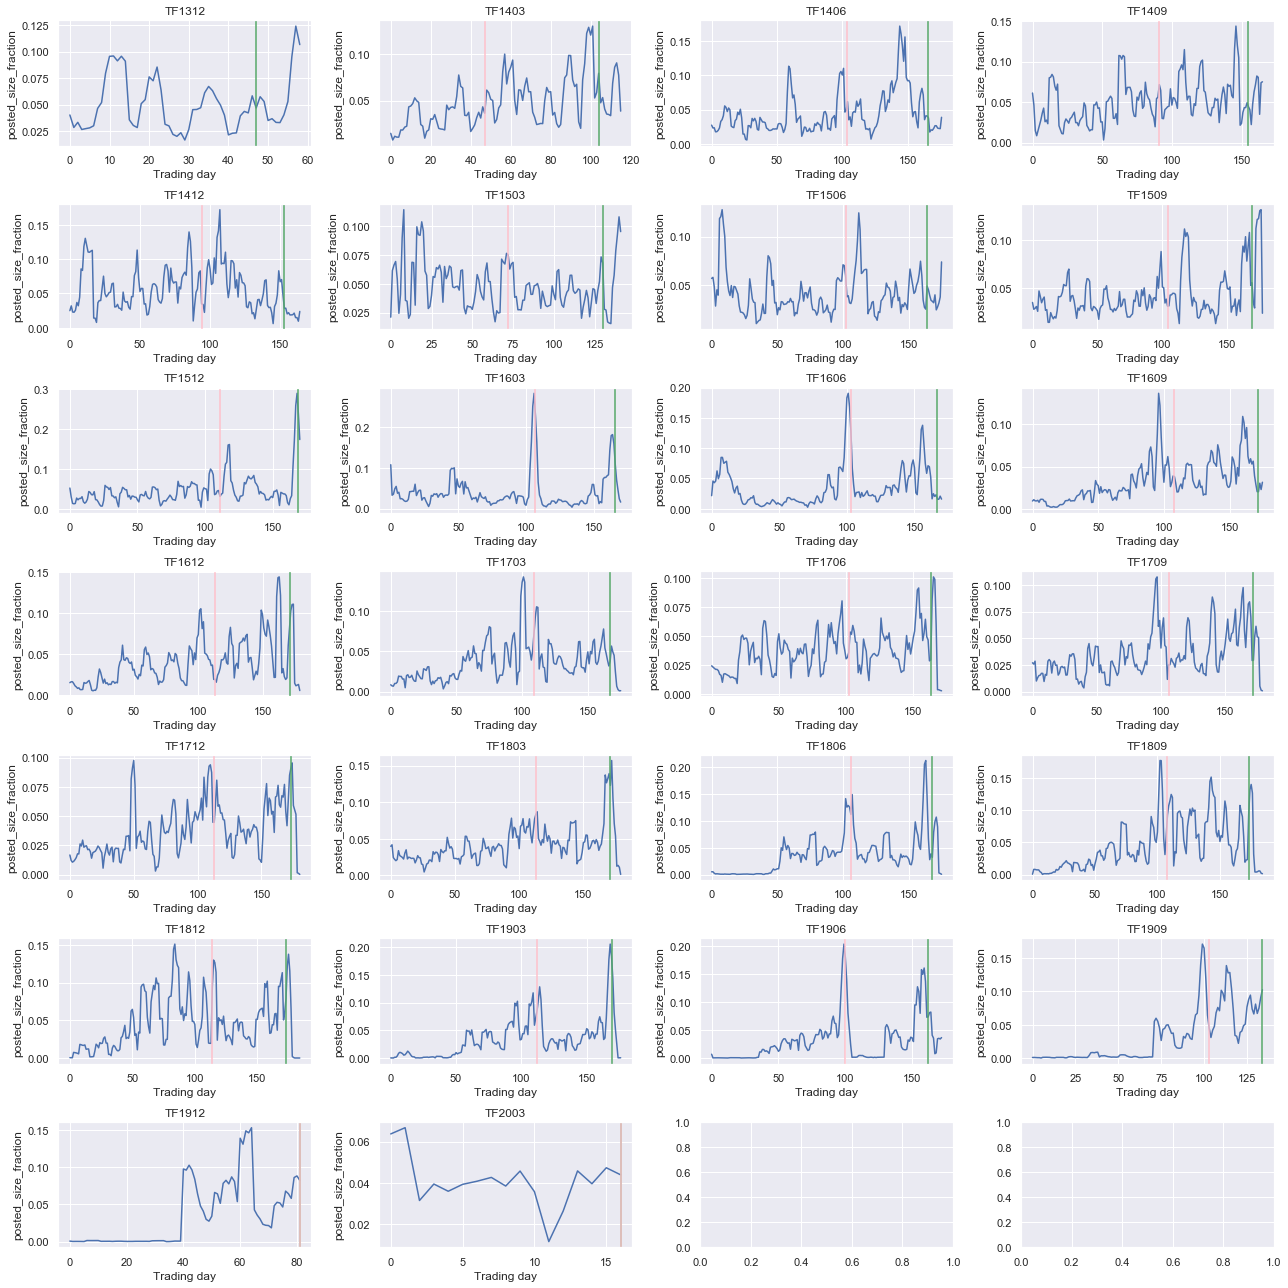

In [14]:
fig, ax = plt.subplots(math.ceil((TF_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_bid_plus_ask[contract].rolling(5).std().dropna()
    ax[j][k].plot(range(len(sample)), sample)

    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Difference

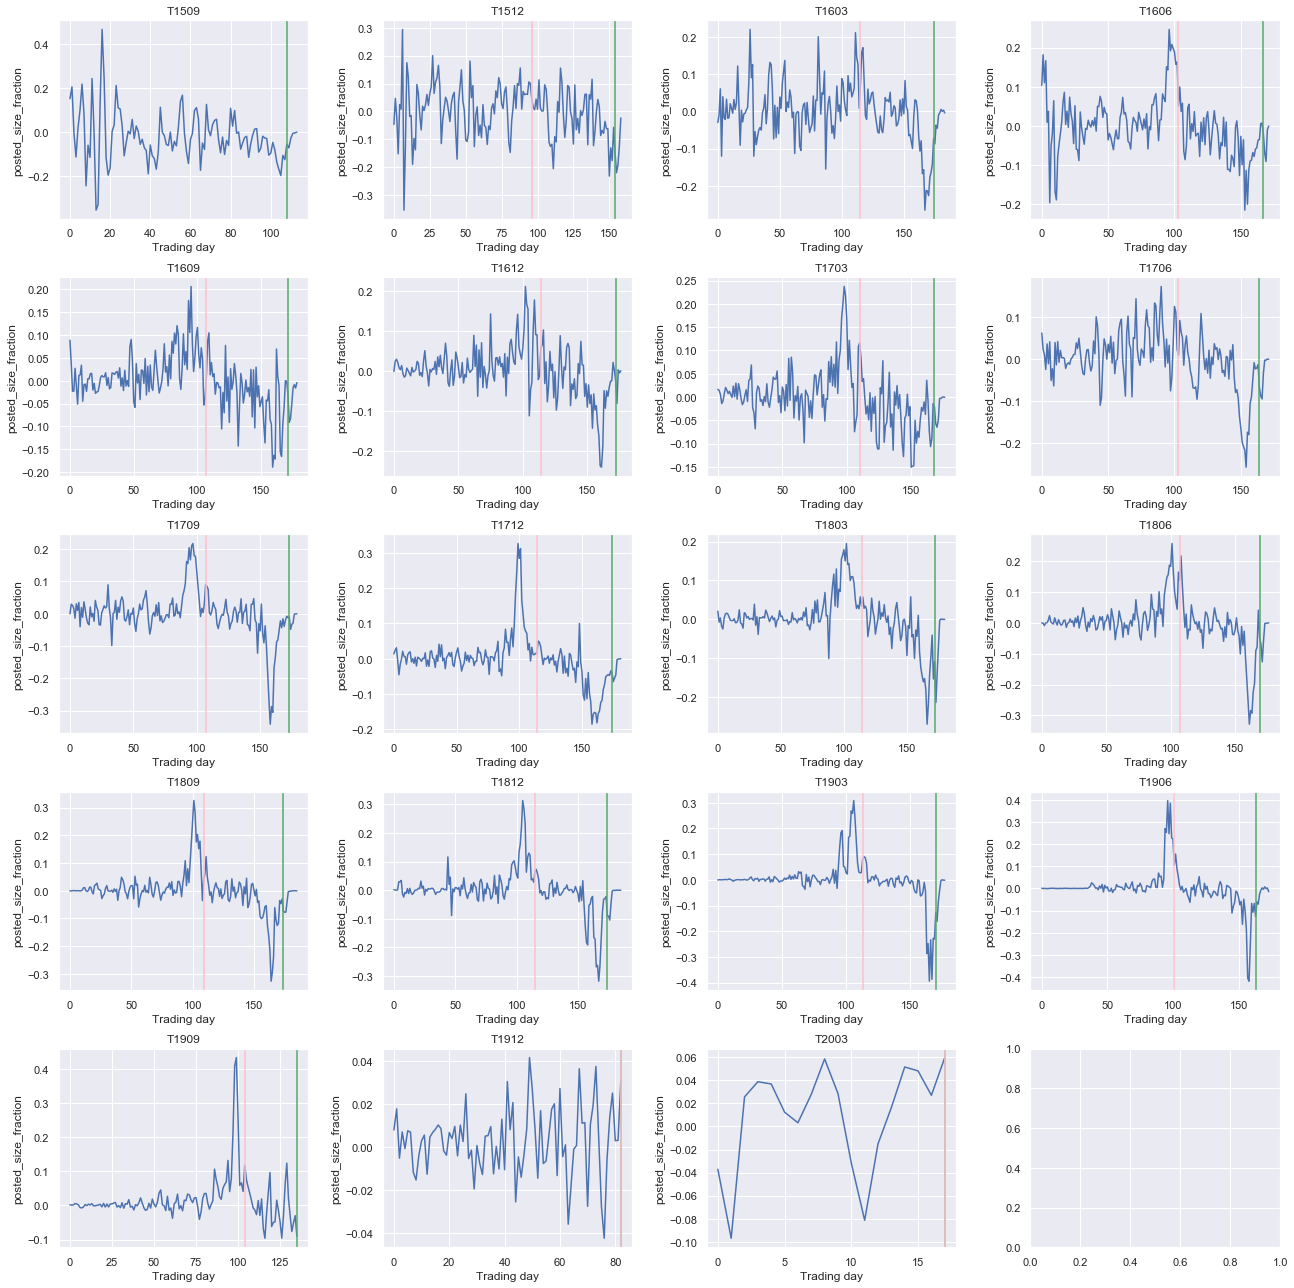

In [15]:
fig, ax = plt.subplots(math.ceil((T_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_bid_plus_ask[contract].diff(3).dropna()
    ax[j][k].plot(range(len(sample)), sample)

    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

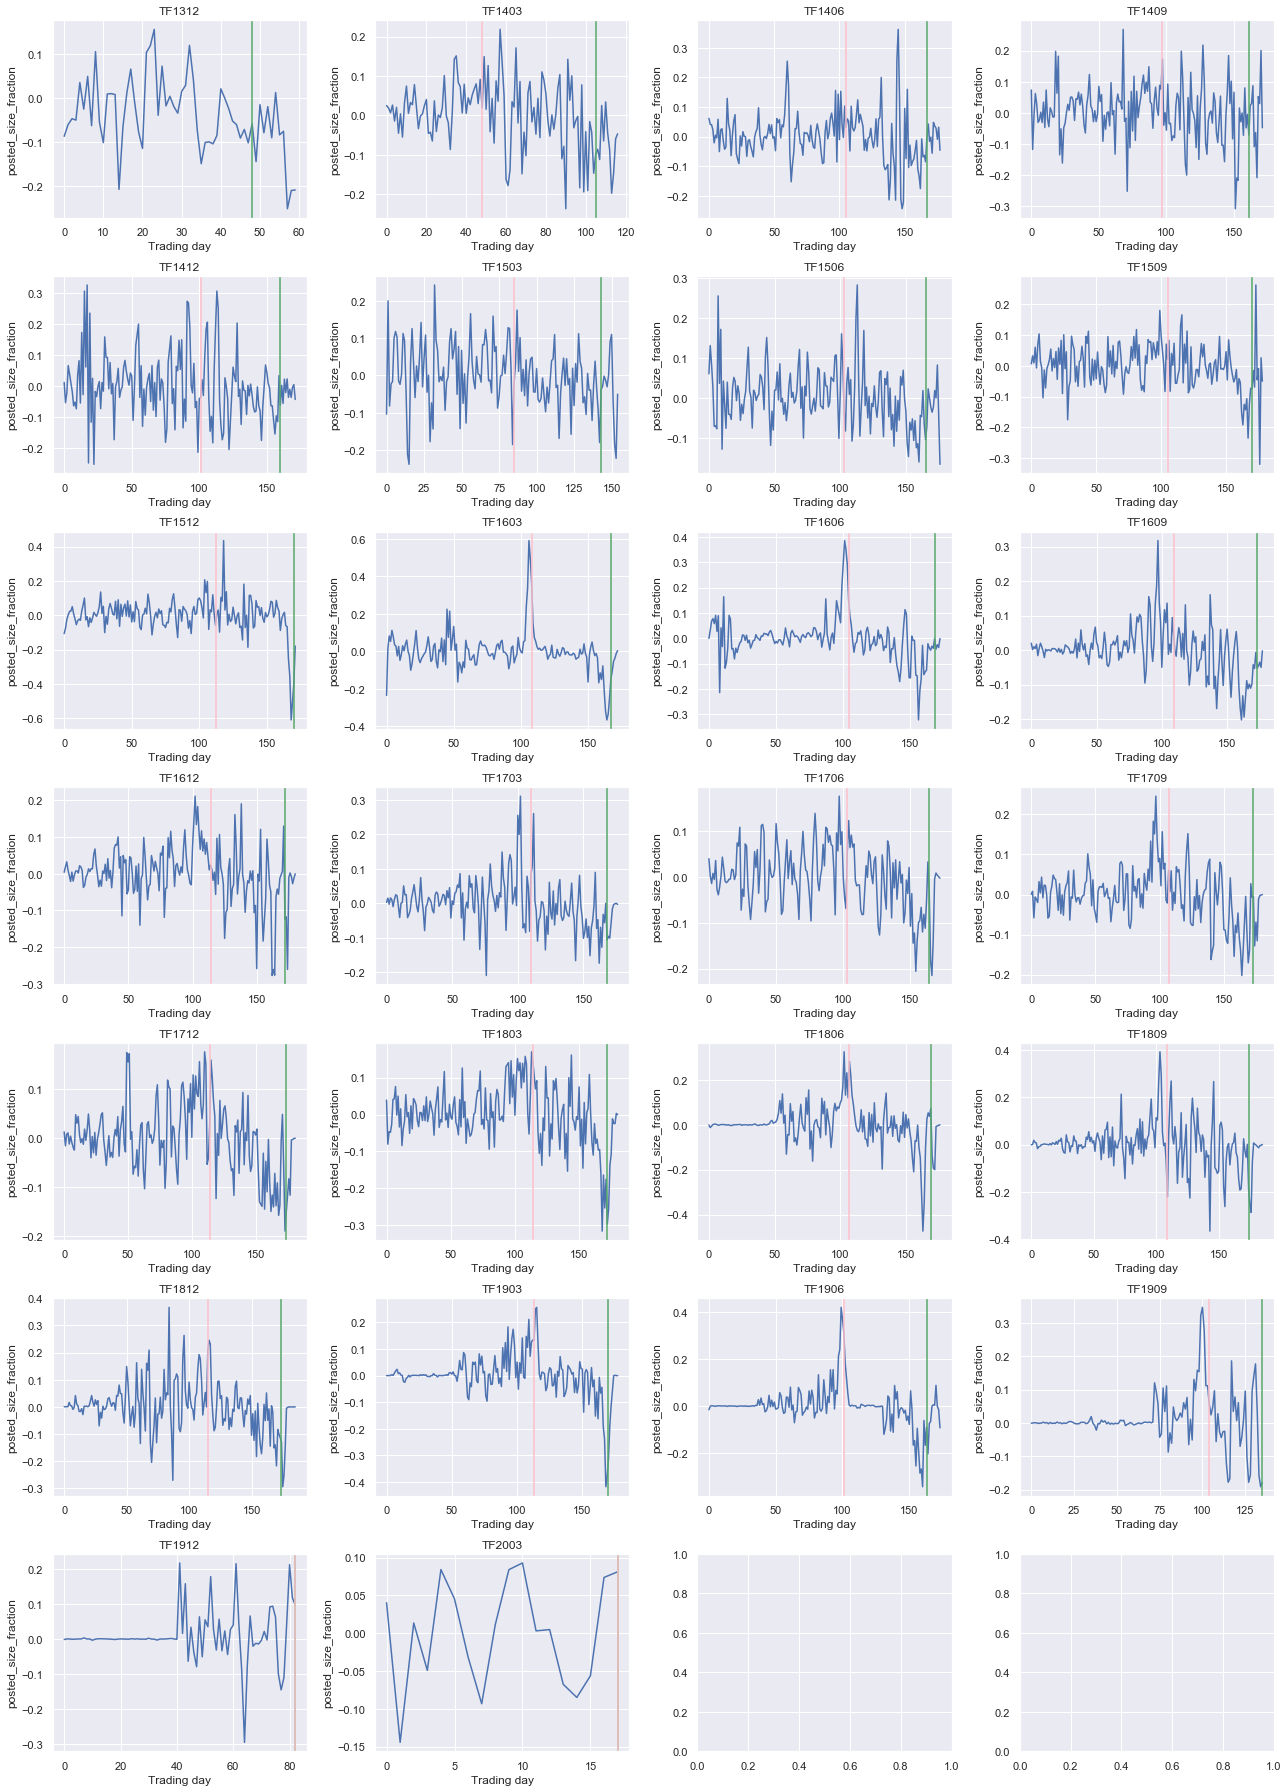

In [16]:
fig, ax = plt.subplots(math.ceil((TF_bid_plus_ask.shape[1]) / 4), 4, figsize=(18, 25))

for i, contract in enumerate(TF_bid_plus_ask.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_bid_plus_ask[contract].diff(3).dropna()
    ax[j][k].plot(range(len(sample)), sample)

    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('posted_size_fraction')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()